# Scraping of Youtube URLs from the website of the Oso Trava band

@roman
5 sep 2023

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import json

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# params
API_KEY = os.environ["YOUTUBE_API_KEY"]
CHANNEL_ID = "UCWVspRnU4QdsR4Av4tDWWRw" # oso trava's youtube channel id

# build youtube api service
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Get info about the Channel


In [3]:
def get_channel_stats(youtube, channel_id):
    """
    Returns a dictionary with the channel's statistics
    """
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    return response

In [4]:
# get osotrava's channel statistics
channel_stats = get_channel_stats(youtube, CHANNEL_ID)

In [5]:
print(json.dumps(channel_stats, indent=4))

{
    "kind": "youtube#channelListResponse",
    "etag": "hqxd4wHm2ZR-mrDCEpTYtpSdVPE",
    "pageInfo": {
        "totalResults": 1,
        "resultsPerPage": 5
    },
    "items": [
        {
            "kind": "youtube#channel",
            "etag": "LJRI0lO7TdrQ2mLNY7dPGEBeSfg",
            "id": "UCWVspRnU4QdsR4Av4tDWWRw",
            "snippet": {
                "title": "Oso Trava",
                "description": "Cracks es un podcast de entrevistas con enfoque en negocios y mentalidad que le ense\u00f1ara a cualquiera que aspire a la grandeza los h\u00e1bitos y trucos que usan los mejores en deportes, negocios, tecnolog\u00eda y medios para lograr el \u00e9xito.\n\nEl objetivo del podcast es motivar a la siguiente generaci\u00f3n de hispanos a vivir vidas con m\u00e1s impacto.\n\nEl podcast es presentado por Oso Trava, emprendedor y fundador de InstaFit, quien ha sido nombrado emprendedor del a\u00f1o por la revista Expansi\u00f3n en 2010 y 2018 e incluido entre las 30 promesas 

# Get all the playlists from the channel

In [6]:
# TODO: get all the videos of the channel iterating through the pages !!!
# function to retraive all the playlists of the channel
def get_channel_playlists(youtube, channel_id):
    """
    Returns a list of dictionaries with the channel's playlists
    """
    request = youtube.playlists().list(
        part="snippet,contentDetails",
        channelId=channel_id,
        maxResults=50
    )
    response = request.execute()
    return response

# function to get next page of results
def get_next_page(youtube, channel_id, pagetoken):
    """
    Returns a list of dictionaries with the channel's playlists
    """
    request = youtube.playlists().list(
        part="snippet,contentDetails",
        channelId=channel_id,
        pageToken=pagetoken,
        maxResults=50
    )
    response = request.execute()
    return response


In [7]:
# get osotrava's channel playlists
channel_playlists = get_channel_playlists(youtube, CHANNEL_ID)
print(json.dumps(channel_playlists, indent=4))

{
    "kind": "youtube#playlistListResponse",
    "etag": "4ih3y7UWFxh4uYVifodJ-ikwdQM",
    "nextPageToken": "CDIQAA",
    "pageInfo": {
        "totalResults": 63,
        "resultsPerPage": 50
    },
    "items": [
        {
            "kind": "youtube#playlist",
            "etag": "BCVuoV-8q-jPZtr5qKk2CHRK4Gk",
            "id": "PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN",
            "snippet": {
                "publishedAt": "2023-06-26T03:11:15Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "CRACKS PODCAST",
                "description": "El mejor podcast de negocios en hablahispana. Un programa donde los m\u00e1s grande representante de su industria, deporte o ciencia exponen sus h\u00e1bitos, memorias y hacks",
                "thumbnails": {
                    "default": {
                        "url": "https://i.ytimg.com/vi/fL9FNpuGK_8/default.jpg",
                        "width": 120,
                        "height": 90
               

In [8]:
# iterate through the pages of results
channel_playlists2 = get_next_page(youtube, CHANNEL_ID, channel_playlists.get("nextPageToken"))

In [9]:
print(json.dumps(channel_playlists2, indent=4))

{
    "kind": "youtube#playlistListResponse",
    "etag": "_SuHhQINeyMebXXYYsoq-_bvU-M",
    "prevPageToken": "CDIQAQ",
    "pageInfo": {
        "totalResults": 63,
        "resultsPerPage": 50
    },
    "items": [
        {
            "kind": "youtube#playlist",
            "etag": "B3kuMNeHX5rXJ8enY5A-giBqCfo",
            "id": "PL5EDqo-XIoDBhADKVdvImUvrRlOJYE7dP",
            "snippet": {
                "publishedAt": "2021-10-10T15:21:17Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "Deportes \u26bd\ufe0f \ud83c\udfc8 \u26be\ufe0f",
                "description": "",
                "thumbnails": {
                    "default": {
                        "url": "https://i.ytimg.com/vi/_qaUtTgxBQA/default.jpg",
                        "width": 120,
                        "height": 90
                    },
                    "medium": {
                        "url": "https://i.ytimg.com/vi/_qaUtTgxBQA/mqdefault.jpg",
                   

In [10]:
channel_playlists.get("prevPageToken")

In [11]:
channel_playlists.get("nextPageToken")

'CDIQAA'

In [12]:
channel_playlists2.get("nextPageToken")

In [13]:
channel_playlists2.get("prevPageToken")

'CDIQAQ'

In [14]:
## count how many playlists there are in the channel
print(len(channel_playlists.get("items")))
print(len(channel_playlists2.get("items")))
# this add's up with the pageinfo.totalresults

50
13


In [15]:
bool(channel_playlists2.get("nextPageToken"))

False

In [16]:
list("hola")

['h', 'o', 'l', 'a']

# Get all the videos of a playlist


In [17]:
# TODO: get all the videos of the channel iterating through the pages !!!
# function to retraive all the videos of a playlist
def get_playlist_videos(youtube, playlist_id):
    """
    Returns a list of dictionaries with the playlist's videos
    """
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()
    return response

In [18]:
# get osotrava's playlist videos
cracks_playlist = channel_playlists2.get('items')[-1].get('id')

# get cracks playlists' videos
cracks_videos = get_playlist_videos(youtube, cracks_playlist)

In [19]:
# print
print(json.dumps(cracks_videos, indent=4))

{
    "kind": "youtube#playlistItemListResponse",
    "etag": "lmiwczXamBQcpVxLRt_ySwffEvA",
    "nextPageToken": "EAAaHlBUOkNESWlFRFUxTmtRNU9FRTFPRVU1UlVaQ1JVRQ",
    "items": [
        {
            "kind": "youtube#playlistItem",
            "etag": "fiWNA7va5hOFCJYvrupt2mWvAhQ",
            "id": "UEw1RURxby1YSW9EQlVjNExlZDhkUGdoUGRlNm4yempSQy41NkI0NEY2RDEwNTU3Q0M2",
            "snippet": {
                "publishedAt": "2019-03-07T16:44:13Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "Leo Tezcucano - C\u00f3mo Aplicar Creatividad de Clase Mundial a Negocios, Arte y la Vida #002.",
                "description": "Entrevista de Oso Trava a Leo Tezcucano, muralista, fot\u00f3grafo y artista del caribe mexicano.\n\n\u201cTodo lo que puedas imaginar es real .\u201d \u2013 Pablo Picasso via Leo Tezcucano\r\n\r\n Leo Tezcucano (@leotezcucano) es artista pl\u00e1stico, dise\u00f1ador y fot\u00f3grafo. Ha logrado posicionar su nombre trabajando de 

In [20]:
# get next page of results
cracks_videos.get("nextPageToken")

'EAAaHlBUOkNESWlFRFUxTmtRNU9FRTFPRVU1UlVaQ1JVRQ'

In [21]:
# open a video
video_id = cracks_videos.get('items')[-1].get('contentDetails').get('videoId')

In [22]:
video_id

'PsTO1X4_pfo'

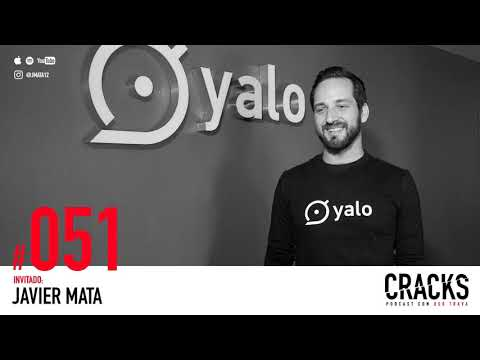

In [23]:
# open a video in youtube
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

# rating of videos

In [24]:
# function to retraive info from a video
def get_video_info(youtube, video_id):
    """
    Returns a dictionary with the video's info
    """
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=video_id
    )
    response = request.execute()
    return response

In [25]:
# get video info
video_info = get_video_info(youtube, video_id)
print(json.dumps(video_info, indent=4)) 

{
    "kind": "youtube#videoListResponse",
    "etag": "d_lp2L8CbgAg2w-WkbH50RlVXlY",
    "items": [
        {
            "kind": "youtube#video",
            "etag": "yBodRvAgRKt1vaVWwD2603NoSEs",
            "id": "PsTO1X4_pfo",
            "snippet": {
                "publishedAt": "2020-01-05T23:17:24Z",
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "title": "Javier Mata - Yalo Chat. C\u00f3mo Tener el Mejor A\u00f1o de tu Vida #051.",
                "description": "Entrevista de Oso Trava con Javier Mata, emprendedor serial Guatemalteco y hoy es fundador y CEO Yalo Chat, una empresa dedicada a la creaci\u00f3n de chatbots de venta.\n\n\u201cLa experiencia es una de las monedas m\u00e1s costosas, porque la experiencia requiere tiempo.\u201d - Javier Mata @jmata12\r\n\r\n Javier es un emprendedor serial Guatemalteco y hoy es fundador y CEO Yalo Chat, una empresa dedicada a la creaci\u00f3n de chatbots de venta y atenci\u00f3n al cliente basados en intel

# comments per video


In [27]:
# get comments from a video
def get_video_comments(youtube, video_id):
    """
    Returns a list of dictionaries with the video's comments
    """
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=video_id,
        maxResults=100
    )
    response = request.execute()
    return response

In [28]:
# get video comments
video_comments = get_video_comments(youtube, video_id)
print(json.dumps(video_comments, indent=4))

{
    "kind": "youtube#commentThreadListResponse",
    "etag": "w23cMPSTuZS96lr2mn1Gu7hlPMs",
    "pageInfo": {
        "totalResults": 6,
        "resultsPerPage": 100
    },
    "items": [
        {
            "kind": "youtube#commentThread",
            "etag": "Yd4pKNKG1eX3i-y4YzXALyPaNSE",
            "id": "Ugwn37fd4kaeDNTGcEx4AaABAg",
            "snippet": {
                "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                "videoId": "PsTO1X4_pfo",
                "topLevelComment": {
                    "kind": "youtube#comment",
                    "etag": "yUTQpPhEX1Efk8rNgRuO0UsXP_Y",
                    "id": "Ugwn37fd4kaeDNTGcEx4AaABAg",
                    "snippet": {
                        "channelId": "UCWVspRnU4QdsR4Av4tDWWRw",
                        "videoId": "PsTO1X4_pfo",
                        "textDisplay": "Estoy literalmente enamorada de tus podcast Oso, los escucho cuando entreno y camino . Son lo m\u00e1ximo !! Todos me han brindado una ense\u00f